In [1]:
import speech_recognition as sr

In [2]:
import numpy as np

In [3]:
import spacy

In [4]:
import pandas as pd

In [5]:
from PIL import Image

In [6]:
import matplotlib.pyplot as plt

In [7]:
articles=pd.read_csv('articles.csv')

In [8]:
articles['price']=np.random.randint(3000,7000,articles.shape[0])

In [9]:
nlp1 = spacy.load(r"./output/model-best")

In [10]:
r=sr.Recognizer()

In [ ]:
with sr.Microphone() as source:
    print('say something')
    audio=r.listen(source,timeout=6)
try:
    speech=r.recognize_google(audio)
except:
    pass;

In [ ]:
speech

In [ ]:
r.listen

say something
get me a pink shirt how 4000
{'colour_group_name': 'pink', 'product_type_name': 'shirt', 'price': '4000'}
507910025


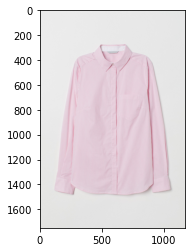

532965007


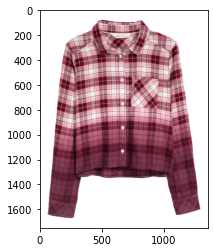

534210006


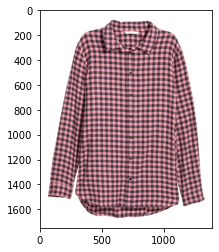

618319019


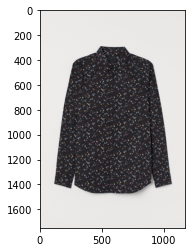

619075002


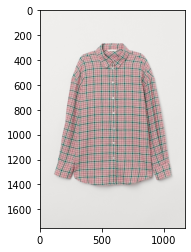

619786002


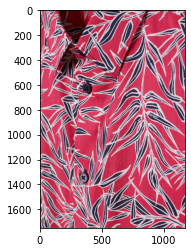

In [22]:
dictionary={}
with sr.Microphone() as source:
    print('say something')
    audio=r.listen(source,10,5)
try:
    speech=r.recognize_google(audio)
except:
    pass;
print(speech)
docs=nlp1(speech)
text=[]
labels=[]
for e in docs.ents:
    text.append(e.text)
    labels.append(e.label_)
dictionary=dict(zip(labels,text))
print(dictionary)
new_dict={}
for i,j in dictionary.items():
    if(i!=('pricing') and (i!= ('price'))):
        new_dict[i]=j.capitalize()
querry=articles.loc[(articles[list(new_dict)] == pd.Series(new_dict)).all(axis=1)]
querry1=querry
for i,j in dictionary.items():
    if(i=='pricing'):
        if(j=='below'):
            querry1=querry[querry.price<int(dictionary['price'])]
        if(j=='above'):
            querry1=querry[querry.price>int(dictionary['price'])]
querry1.article_id.head()
ids=querry1.article_id.values[:6]
for x in ids:
    print(x)
    x=str(x)
    path=f"C:/Users/Convergytics/Desktop/H and M/HM Personal_Laptop/images/0{x[0:2]}/0{x}.jpg"
    pil_im = Image.open(path)
    plt.imshow(pil_im)
    plt.show()

In [ ]:
dictionary

In [14]:
articles.product_type_name.unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',